In [3]:
# PYTHON 3.10.12

from IPython.display import Image #IPython
import cv2 # 4.8.0
import numpy as np # 1.23.5
import pandas as pd # 1.5.3
import matplotlib.pyplot as plt # 3.7.1
import seaborn as sns # 0.12.2
from scipy.cluster.hierarchy import dendrogram, linkage # 1.11.3

In [7]:
from processing_funcs import image_paths
import os

# base level of project
base_dir = os.path.dirname(os.getcwd())

# data directory
data_dir = os.path.join(base_dir, 'data')

# nightly image dir
nightly_image_path = os.path.join(data_dir, 'NightlyImagesforData2023')

# make sure these match folder names!
dates_of_interest = ['7_07', '7_08', '7_09', '7_10', '7_11', '7_12', '7_13']

image_paths_list, folder_names = image_paths(path=nightly_image_path, folder_names=dates_of_interest)

In [9]:
from processing_funcs import image_process, image_data
import shutil


column_names = [
        'id', 'box_SA', 'cont_SA', 'B_avg', 'G_avg', 'R_avg', 'B_dom', 'G_dom',
        'R_dom', 'B_cont_mean', 'G_cont_mean', 'R_cont_mean', 'H_cont_mean',
        'S_cont_mean', 'V_cont_mean', 'H_diff_180', 'h_0.0', 'h_21.2', 'h_42.4',
        'h_63.5', 'h_84.7', 'h_105.9', 'h_127.1', 'h_148.2', 'h_169.4',
        'h_190.6', 'h_211.8', 'h_232.9', 'h_254.1', 'h_275.3', 'h_296.5',
        'h_317.6', 'h_338.8']

df = pd.DataFrame(None, columns=column_names)

for image_path, folder_name in zip(image_paths_list, folder_names):
    original_image = cv2.imread(image_path)
    sub_image_dir = os.path.join(os.path.dirname(image_path), 'sub_images')
    # if sub image dir already exist, remove
    if os.path.isdir(sub_image_dir):
        shutil.rmtree(sub_image_dir)
    # change directory to image path
    os.makedirs(sub_image_dir)
    os.chdir(sub_image_dir)
    cropped_img, cropped_notmask = image_process(original_image)
    df_i = image_data(cropped_img, cropped_notmask, folder_name)
    df = pd.concat([df,df_i], axis=0).reset_index(drop=True)


df.head()
    

,id,box_SA,cont_SA,B_avg,G_avg,R_avg,B_dom,G_dom,R_dom,B_cont_mean,...,h_148.2,h_169.4,h_190.6,h_211.8,h_232.9,h_254.1,h_275.3,h_296.5,h_317.6,h_338.8
0,7_13_19,5760,2686.5,126.615972,126.514931,149.843056,185.328781,150.432831,165.420120,92.839450,...,0.0,0.0,0.0,0.0,0.001563,0.298264,0.039236,0.024653,0.032465,0.054167
1,7_13_20,8424,3169.0,135.947768,122.412393,150.087369,200.823196,148.428528,165.602631,85.950595,...,0.0,0.0,0.0,0.0,0.006173,0.363248,0.032526,0.021486,0.044041,0.098647
2,7_13_33,7776,3553.5,123.200360,120.786394,144.556070,96.617691,128.883530,154.030838,84.617394,...,0.0,0.0,0.0,0.0,0.140689,0.105967,0.016590,0.011574,0.013246,0.020319
3,7_13_40,2632,1409.0,131.474544,115.532675,137.828267,76.092690,85.530388,108.802269,81.851678,...,0.0,0.0,0.0,0.0,0.168313,0.149696,0.030015,0.020517,0.029255,0.043693
4,7_13_42,3717,2357.0,129.327953,105.258811,122.088781,245.505585,158.315109,175.450867,80.373366,...,0.0,0.0,0.0,0.0,0.246435,0.108152,0.035243,0.022061,0.033898,0.052731


In [10]:
df.shape

(58, 33)

In [11]:
df_path = os.path.join(data_dir, 'sample_output.csv')
df.to_csv(df_path, index=False)

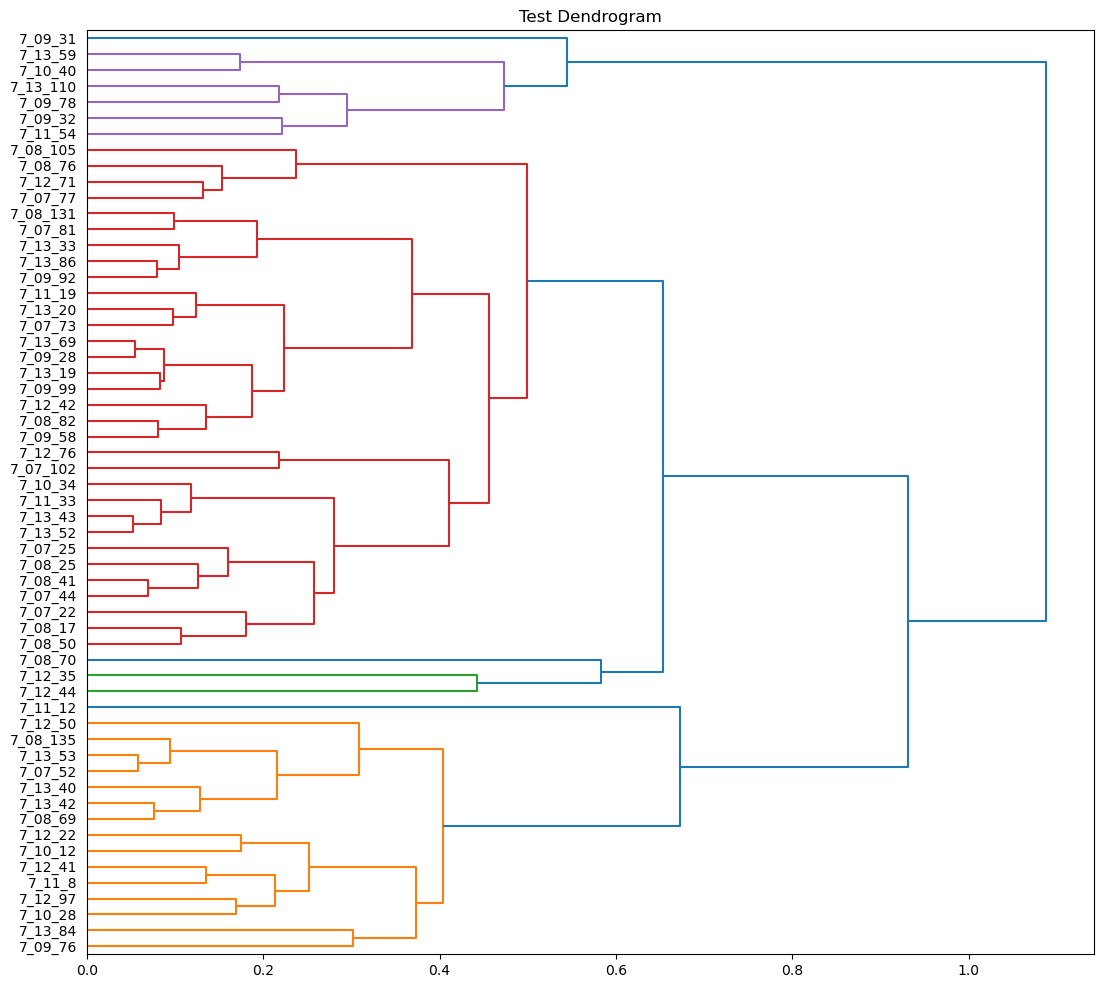

In [9]:
from processing_funcs import hierarchical_clustering

hierarchical_clustering(
    df, labels=list(df['id']),
    box_SA=True,
    cont_SA=True,
    avg_cont_color=True,
    hue_band=True,
    dend_title='Test Dendrogram',
    color_threshold=0.5
    
    )